In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
final_df = pd.read_csv("cleaned.csv")

In [4]:
final_df

,Unnamed: 0,Country,year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0,Algeria,2000,0.020,76.9,87931.0,25.0,26998.0,5.479006e+10,0.0350,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08
1,1,Angola,2000,0.050,52.1,9542.0,119.0,7499.0,9.129595e+09,0.0340,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08
2,2,Benin,2000,0.043,75.7,1617.0,32.0,1983.0,2.359122e+09,0.0430,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07
3,3,Botswana,2000,0.027,17.1,4276.0,107.0,1836.0,5.788312e+09,0.0470,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08
4,4,Burkina Faso,2000,0.046,47.5,1041.0,40.0,18227.7,2.610959e+09,0.0510,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2647,Trinidad and Tobago,2012,0.015,29.1,50682.0,41.0,20918.0,2.343634e+10,0.0540,...,74.0,66.0,1.4,0.207,0.705,0.088,1337439.0,0.088,6.500000e+08,1.920000e+08
2648,2648,United States,2012,0.013,46.4,5433057.0,5.0,2132446.0,1.624460e+13,0.1790,...,81.0,76.0,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11
2649,2649,Uruguay,2012,0.015,41.9,6645.0,7.0,4430.0,5.000435e+10,0.0890,...,80.0,74.0,1.5,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09
2650,2650,"Venezuela, RB",2012,0.020,61.9,201747.0,144.0,70198.0,3.812862e+11,0.0460,...,78.0,72.0,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09


## TOP  AND BOTTOM 10 GDP AND GLOBAL GDP ACROSS YEARS

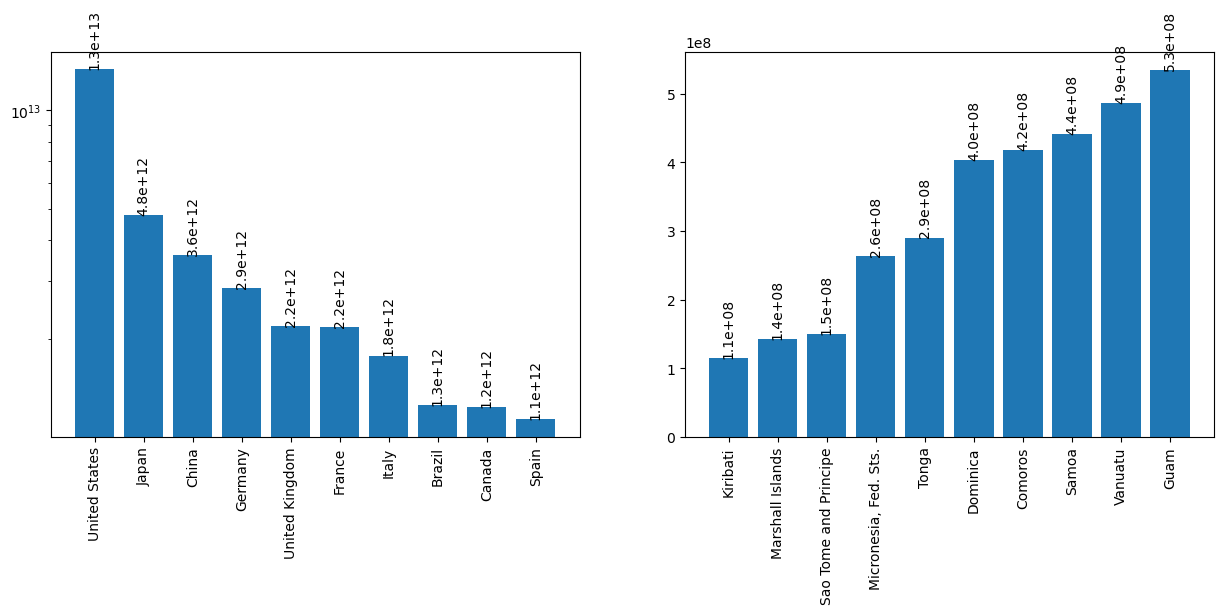

''

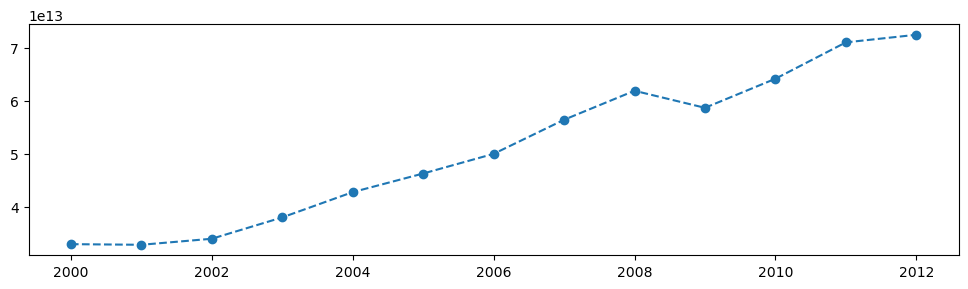

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


top_10_gdp = final_df.groupby("Country")["GDP"].mean().nlargest(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, log=True)
ax[0].set_xticklabels(top_10_gdp.index,rotation=90,)
for i, value in enumerate(top_10_gdp):
    ax[0].text(i, value, f'{value:.1e}', ha='center', va='bottom', rotation=90,)

    
bottom_10_gdp = final_df.groupby("Country")["GDP"].mean().nsmallest(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation=90,)

for i, value in enumerate(bottom_10_gdp):
    ax[1].text(i, value, f'{value:.1e}', ha='center', va='bottom', rotation=90, )
plt.show()
    
fig, ax = plt.subplots(figsize =(12,3))
ax.plot(final_df.groupby('year')["GDP"].sum().index,(final_df.groupby('year')["GDP"].sum()),
        marker="o", linestyle="--")
;

## TOP AND BOTTOM 10 POPULATION AND GLOBAL POPULATION ACROSS YEARS

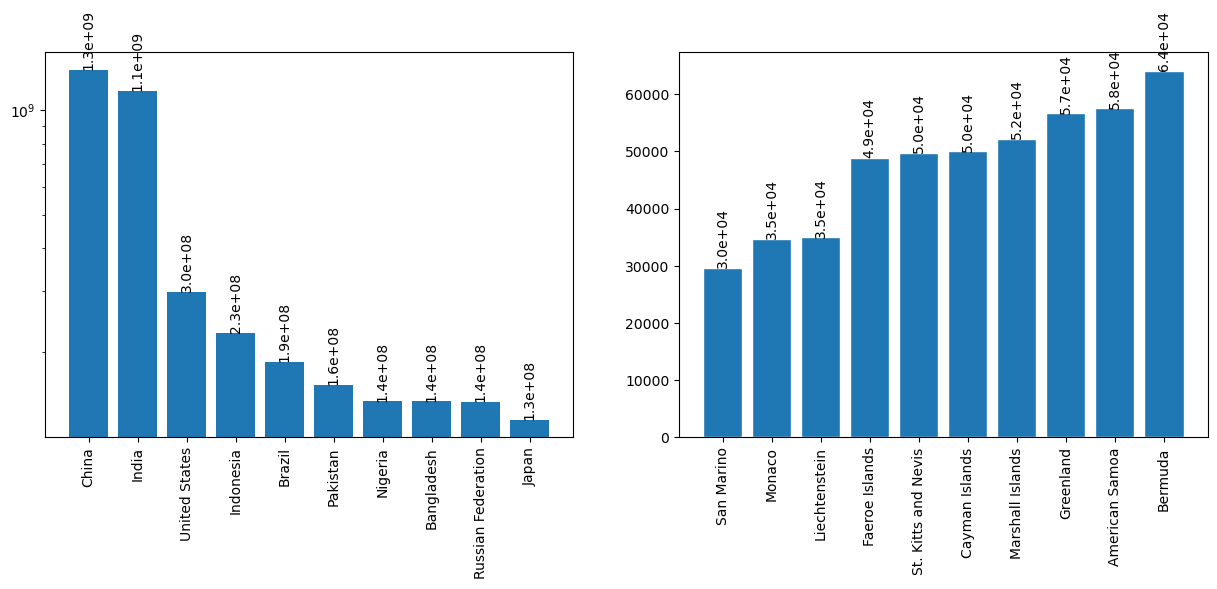

''

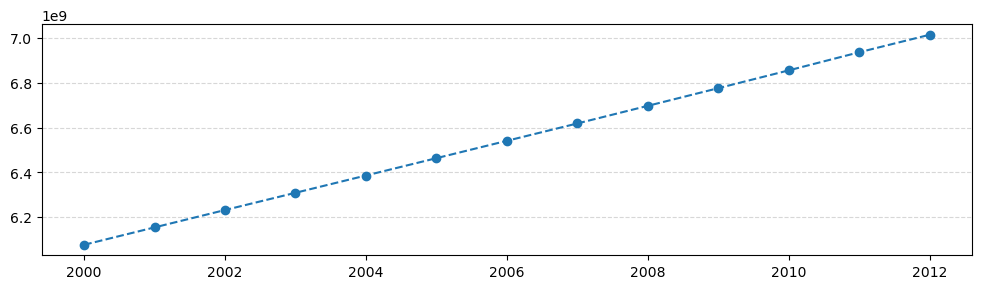

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


top_10_gdp = final_df.groupby("Country")["Population Total"].mean().nlargest(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, log=True)
ax[0].set_xticklabels(top_10_gdp.index, rotation=90,)
for i, value in enumerate(top_10_gdp):
    ax[0].text(i, value, f'{value:.1e}', ha='center', va='bottom', rotation=90)

    
bottom_10_gdp = final_df.groupby("Country")["Population Total"].mean().nsmallest(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp,  edgecolor="w",)
ax[1].set_xticklabels(bottom_10_gdp.index, rotation=90)
for i, value in enumerate(bottom_10_gdp):
    ax[1].text(i, value, f'{value:.1e}', ha='center', va='bottom', rotation=90, )
plt.show()
    
fig, ax = plt.subplots(figsize =(12,3))
ax.plot(final_df.groupby('year')["Population Total"].sum().index,(final_df.groupby('year')["Population Total"].sum()),
        marker="o", linestyle="--")
ax.grid(axis="y",linestyle='--', alpha=0.5)

;

## Checking population an gdp of top and bottom countries 

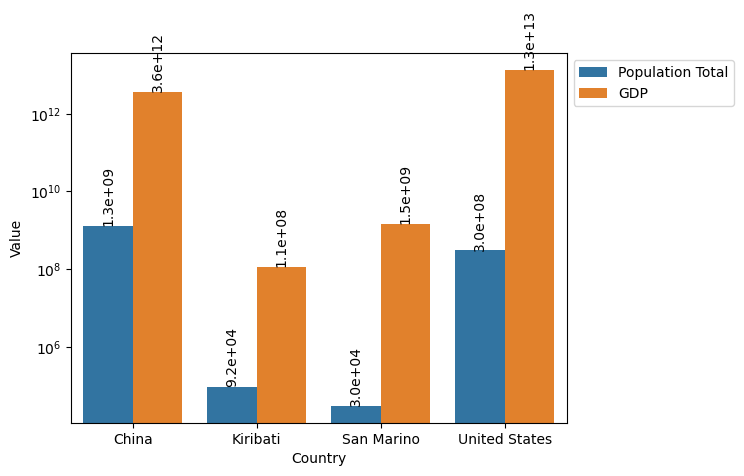

In [18]:
filtered_countries = final_df[final_df["Country"].isin(["United States", 'China', 'San Marino', "Kiribati"])]
mean = filtered_countries.groupby("Country")[["Population Total", "GDP"]].mean().reset_index()
mean_melted = mean.melt(id_vars="Country", var_name="Metric", value_name="Value")

ax = sns.barplot(x="Country", y="Value", hue="Metric", data=mean_melted,  log=True)


ax.legend(bbox_to_anchor =(1,1), loc="upper left")
for i in ax.containers:
    ax.bar_label(i,rotation=90,fmt='%.1e', label_type='edge')


## GDP PER CAPITA

In [19]:
final_df['GDP/Capita'] = final_df["GDP"] / final_df["Population Total"]

In [20]:
mean.melt(id_vars="Country", value_name="Value", var_name="Metric")

,Country,Metric,Value
0,China,Population Total,1.309265e+09
1,Kiribati,Population Total,9.183538e+04
2,San Marino,Population Total,2.962885e+04
3,United States,Population Total,2.983420e+08
4,China,GDP,3.615967e+12
5,Kiribati,GDP,1.145310e+08
6,San Marino,GDP,1.456969e+09
7,United States,GDP,1.330715e+13


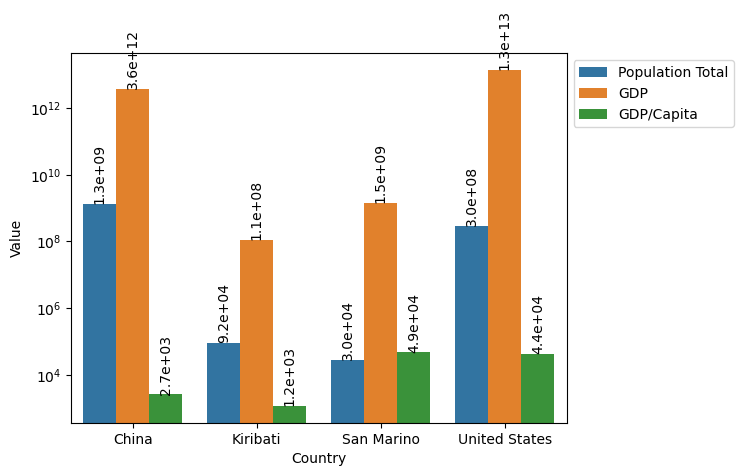

In [21]:
filtered_countries = final_df[final_df["Country"].isin(["United States", 'China', 'San Marino', "Kiribati"])]
mean = (filtered_countries.groupby("Country")[["Population Total", "GDP", "GDP/Capita"]].mean()).reset_index()

mean_melted = mean.melt(id_vars="Country", value_name="Value", var_name="Metric")
ax = sns.barplot(x="Country", y="Value", hue="Metric", data=mean_melted, log=True)


ax.legend(bbox_to_anchor =(1,1), loc="upper left")
for i in ax.containers:
    ax.bar_label(i,rotation=90,fmt='%.1e', label_type='edge')


## TOP AND BOTTOM 10 GDP/CAPITA COUNTRY AND GDP/CAPITA OVER YEARS GOBAL

''

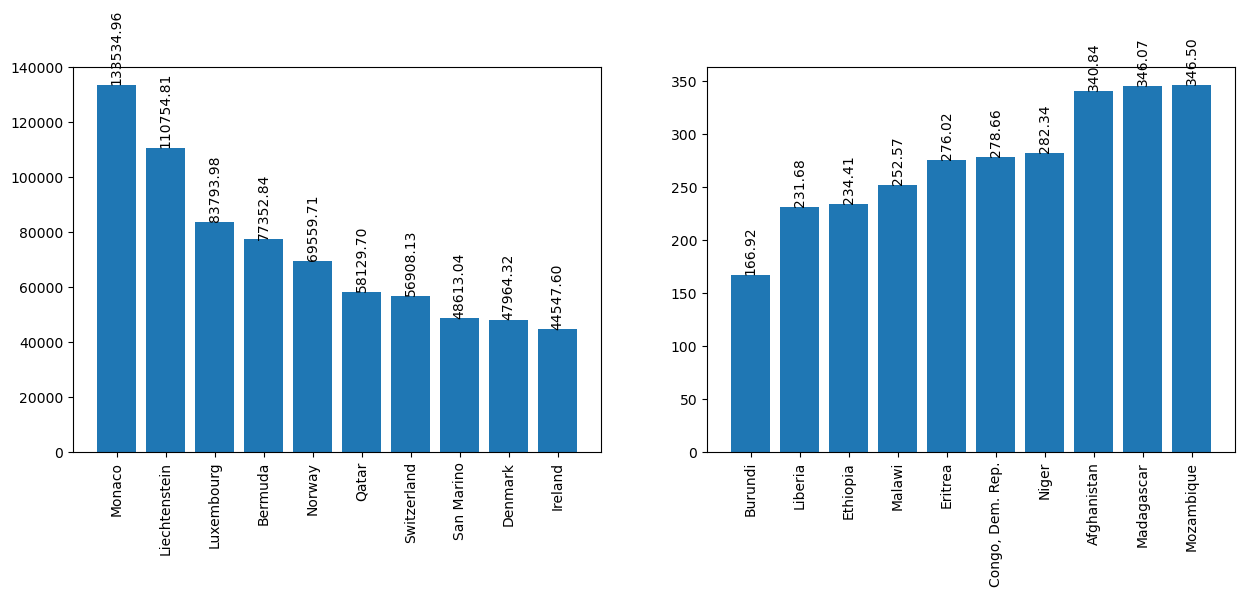

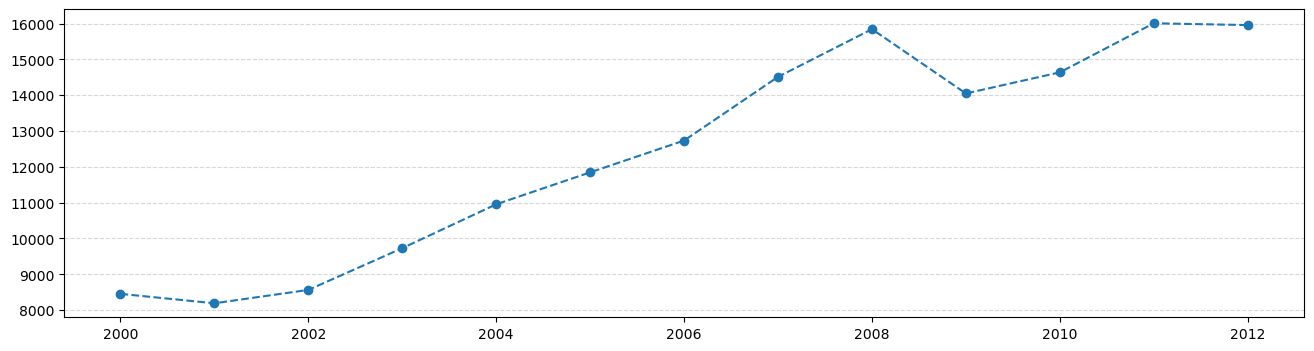

In [23]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["GDP/Capita"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp,)
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{value:.2f}', ha='center', va='bottom', rotation =90)

    
    
bottom_10_gdp = (final_df.groupby("Country")["GDP/Capita"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp,)
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{value:.2f}', ha='center', va='bottom', rotation =90)    

    
    
fig, ax = plt.subplots(figsize =(16,4))
ax.plot(final_df.groupby('year')["GDP/Capita"].sum().index,final_df.groupby('year')["GDP/Capita"].mean(),
        marker="o", linestyle="--") 
ax.grid(axis="y",linestyle='--', alpha=0.5)
;

## GDP GROWTH RATE

In [24]:
mean_by_year = final_df.groupby('year')[["GDP", "GDP/Capita", "Population Total"]].mean()

In [25]:
mean_by_year["GDP growth rate"] = mean_by_year["GDP"].pct_change()*100
mean_by_year["GDP/Capita grwoth rate"] = mean_by_year["GDP/Capita"].pct_change()*100
mean_by_year["Population grwoth rate"] = mean_by_year["Population Total"].pct_change()*100

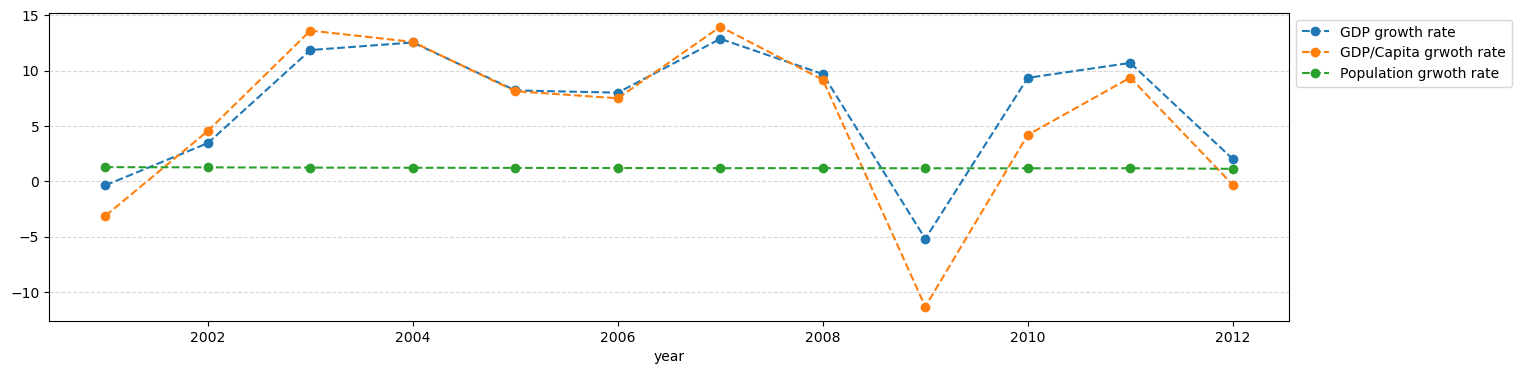

In [27]:
mean_by_year[['GDP growth rate'	,'GDP/Capita grwoth rate',	'Population grwoth rate']].\
plot(figsize=(16,4), style="--o", 
     label=["GDP growth rate", "GDP/Capita growth rate", "Population growth rate"])
plt.legend(bbox_to_anchor =(1,1), loc="upper left")
plt.grid(axis="y",linestyle='--', alpha=0.5)


## POPULATION OF WORLD BY AGE GROUP

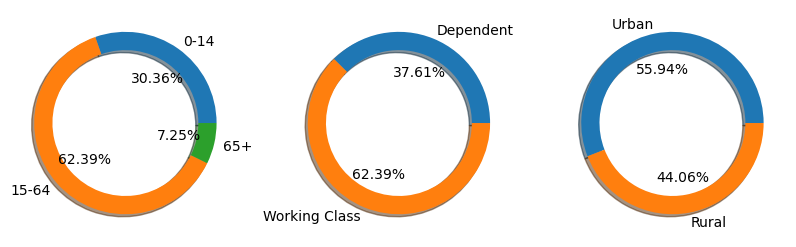

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.pie([final_df["Population 0-14"].mean() , final_df["Population 15-64"].mean(), final_df["Population 65+"].mean()]
      , wedgeprops={'width':0.2,}, 
        autopct="%.2f%%", labels= ["0-14",'15-64','65+'], shadow=True)

plt.subplot(1,3,2)
plt.pie([final_df["Population 0-14"].mean() + final_df["Population 65+"].mean(), final_df["Population 15-64"].mean()]
      , wedgeprops={'width':0.2,}, autopct="%.2f%%", 
        labels= ["Dependent",'Working Class'],shadow=True)
plt.subplot(1,3,3)
plt.pie([final_df["Population Urban"].mean() , 1 - final_df["Population Urban"].mean()]
      , wedgeprops={'width':0.2, }, autopct="%.2f%%", labels= ["Urban",'Rural'], shadow=True);



## TOP AND BOTTOM COUNTRIES WITH URBAN 

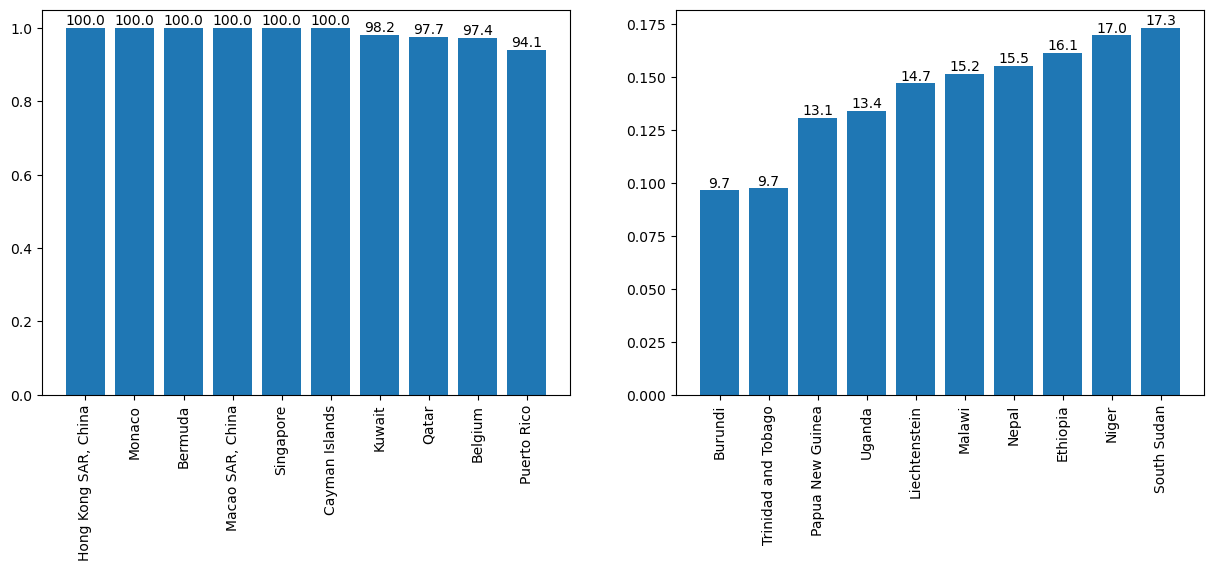

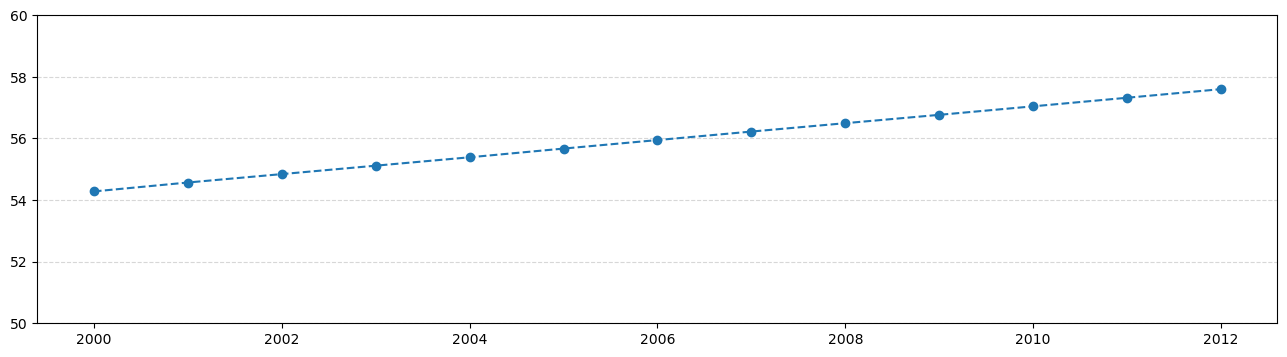

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Population Urban"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{(value*100):.1f}', ha='center', va='bottom')

    
    
bottom_10_gdp = (final_df.groupby("Country")["Population Urban"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{(value*100):.1f}', ha='center', va='bottom')    

   
plt.figure(figsize =(16,4))
plt.plot(final_df.groupby('year')["Population Urban"].mean().index,
         final_df.groupby('year')["Population Urban"].mean().mul(100),  marker="o", linestyle="--")
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.ylim(50,60);

Text(0.5, 0, '')

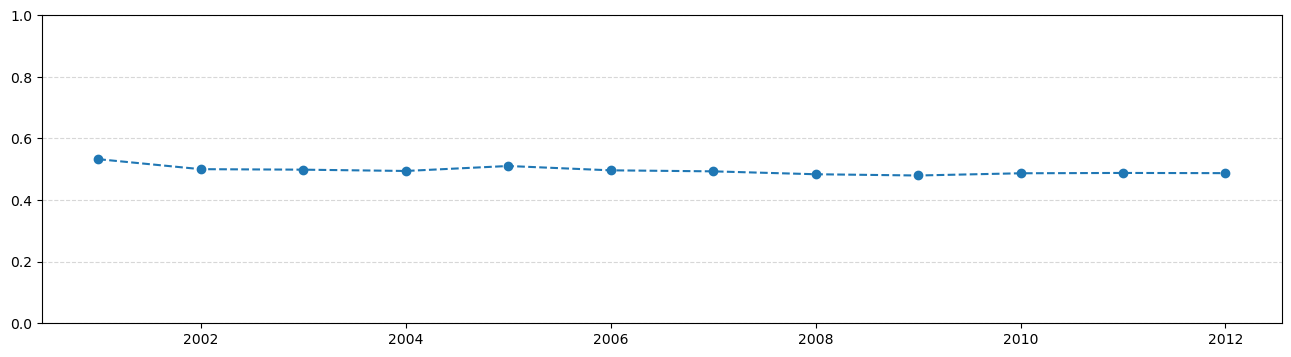

In [33]:
final_df.groupby("year")["Population Urban"].mean().pct_change().mul(100).plot(style="--o", figsize=(16,4),)
plt.ylim(0,1)
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)

## ENERGY USAGE BY COUNTRY AND ACROSS YEAR

(45000.0, 70000.0)

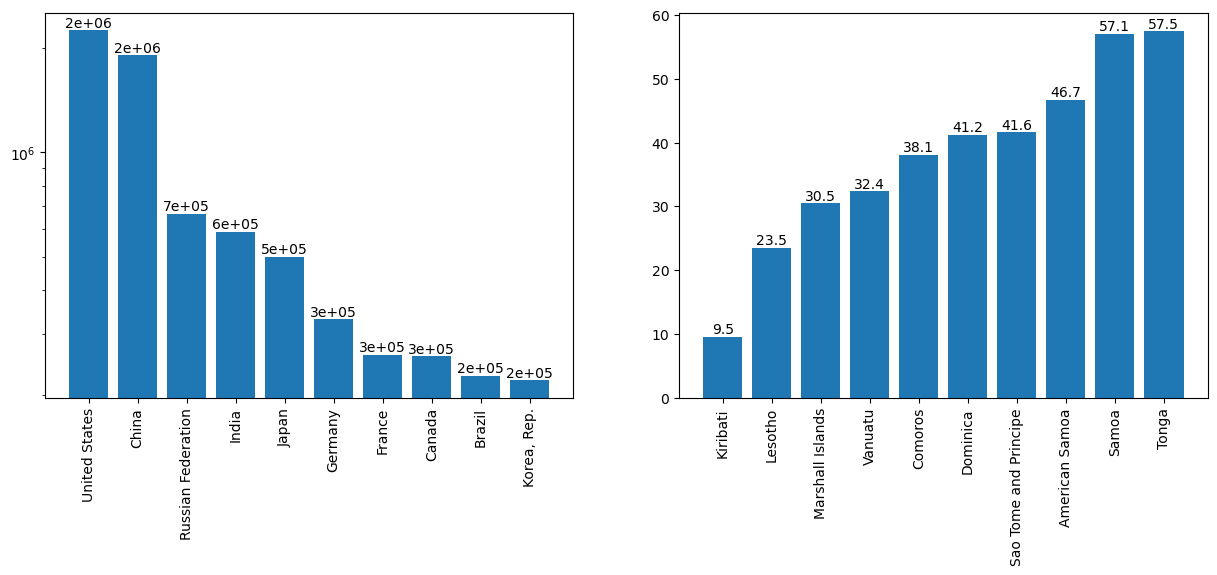

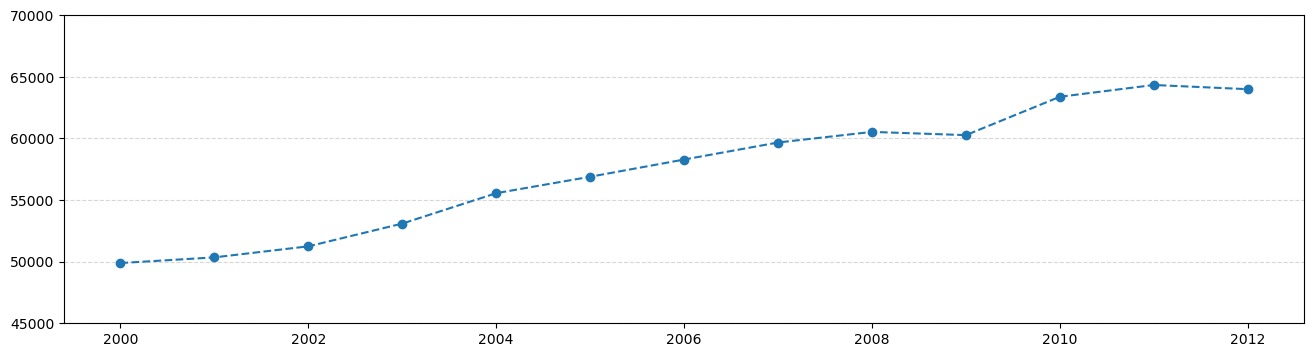

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Energy Usage"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, log=True, )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{value:.0e}', ha='center', va='bottom',)

    
    
bottom_10_gdp = (final_df.groupby("Country")["Energy Usage"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{value:.1f}', ha='center', va='bottom', )    

   
plt.figure(figsize =(16,4))
final_df.groupby("year")["Energy Usage"].mean().plot(style="--o", )
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(45000,70000)

## ENERGY USAGE PER CAPITA

(1.0, 2.0)

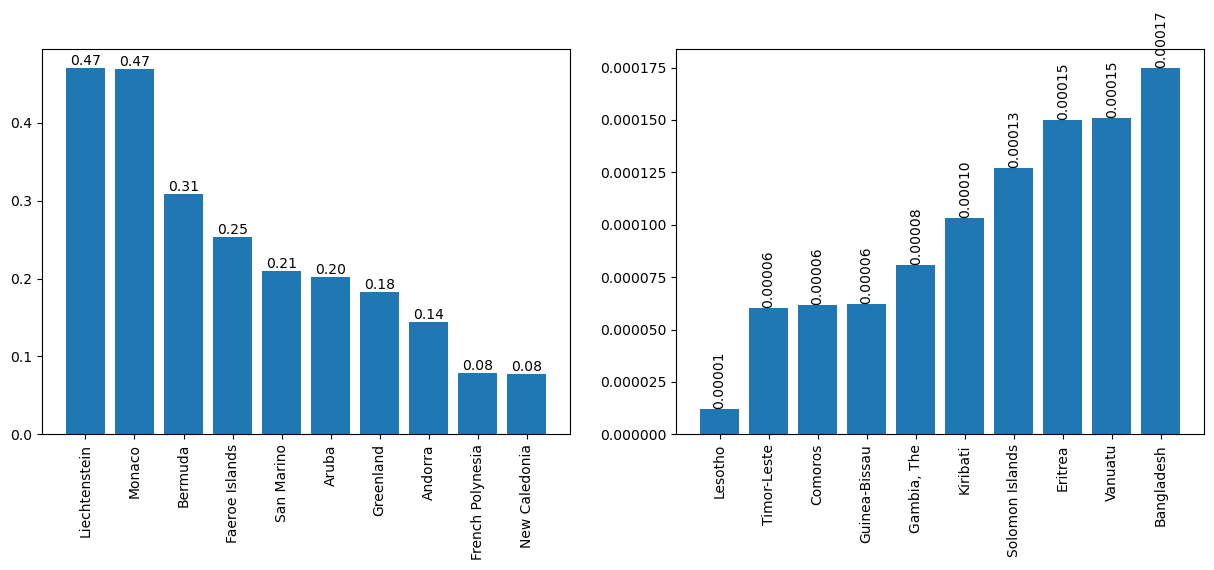

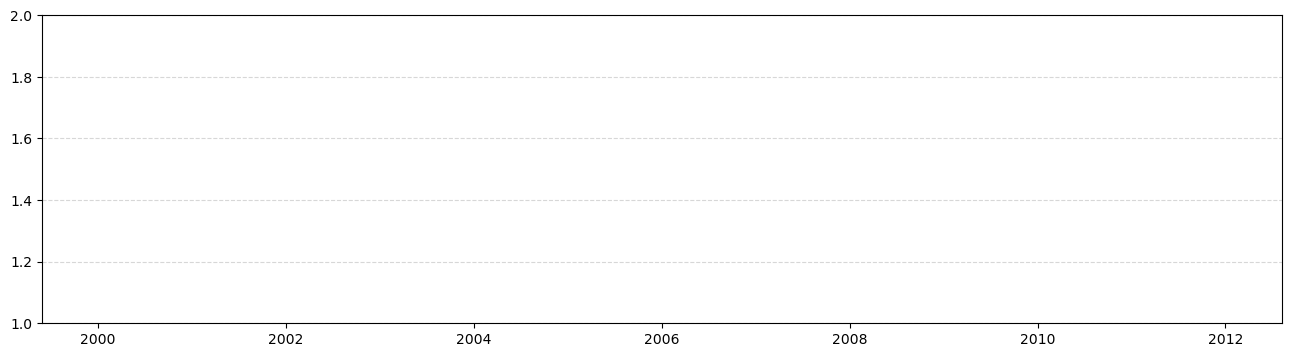

In [8]:
final_df["Energy_use/capita"] = (final_df["Energy Usage"] / final_df["Population Total"])
fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Energy_use/capita"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp)
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{value:.2f}', ha='center', va='bottom', )

    
    
bottom_10_gdp = (final_df.groupby("Country")["Energy_use/capita"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{value:.5f}', ha='center', va='bottom', rotation=90)    

   
plt.figure(figsize =(16,4))
final_df.groupby("year")["Energy_use/capita"].mean().plot(style="--o", )
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(1,2)

## CO2 EMISSION BY COUNTRY AND ACROSS YEAR

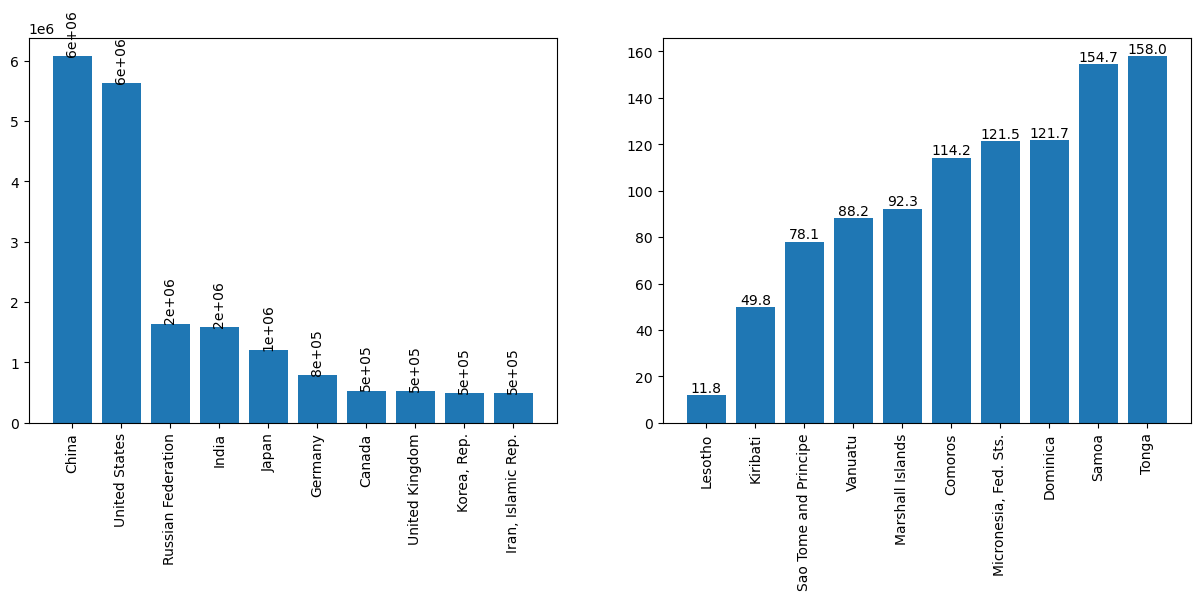

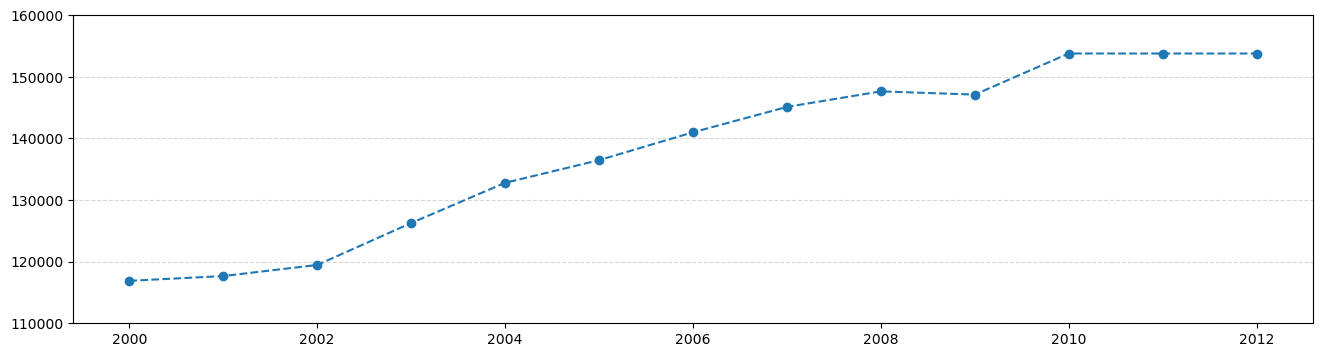

In [37]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["CO2 Emissions"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp,)
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{value:.0e}', ha='center', va='bottom', rotation =90)

    
    
bottom_10_gdp = (final_df.groupby("Country")["CO2 Emissions"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{value:.1f}', ha='center', va='bottom',)    

   
plt.figure(figsize =(16,4))
final_df.groupby("year")["CO2 Emissions"].mean().plot(style="--o", )
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(110000,160000);

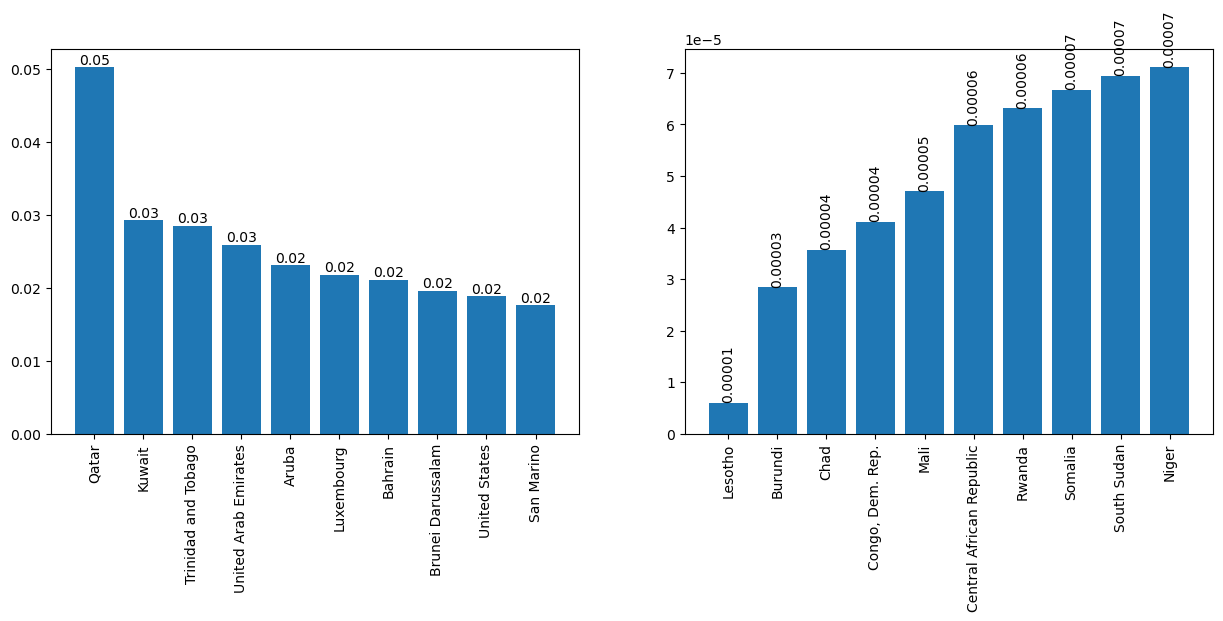

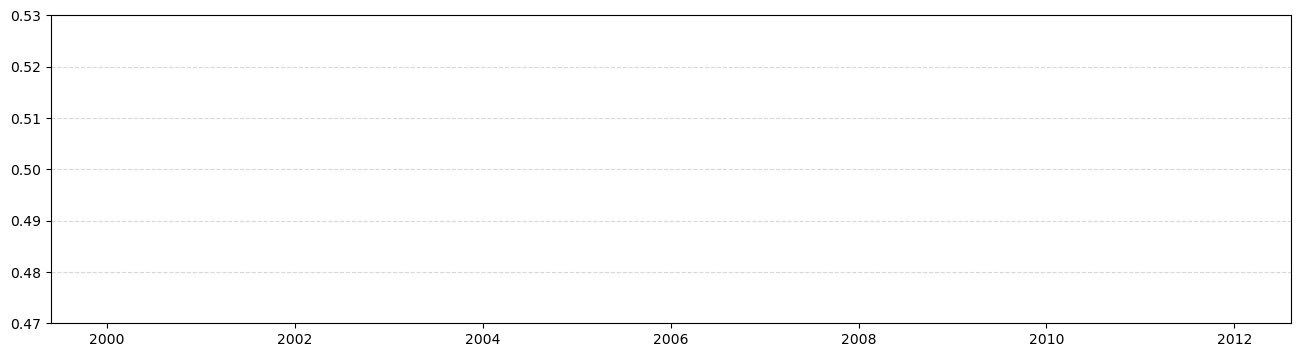

In [11]:
final_df["CO2 Emissions/capita"] = (final_df["CO2 Emissions"] / final_df["Population Total"])
fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["CO2 Emissions/capita"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{value:.2f}', ha='center', va='bottom',)

    
    
bottom_10_gdp = (final_df.groupby("Country")["CO2 Emissions/capita"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{value:.5f}', ha='center', va='bottom',rotation = 90)    

   
plt.figure(figsize =(16,4))
final_df.groupby("year")["CO2 Emissions/capita"].mean().plot(style="--o", )
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(0.47,0.53);

## CORRELATION BETWEEN GDP , POPULATION AND CO2 EMMISIONS

<Axes: >

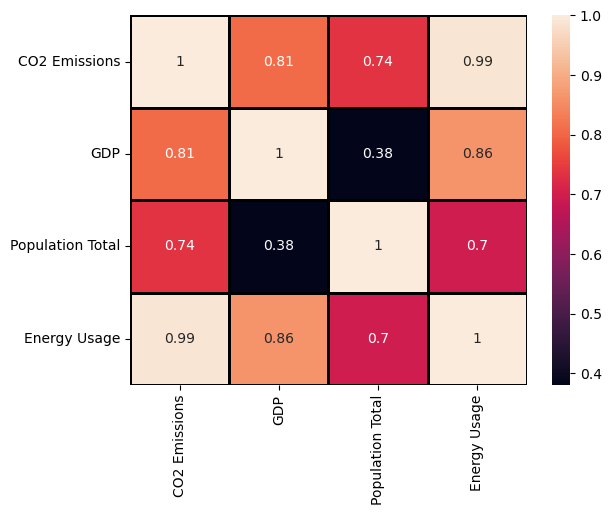

In [12]:
sns.heatmap(final_df[["CO2 Emissions" , "GDP","Population Total" , "Energy Usage",]].corr(), 
            annot=True,linecolor="black",linewidths=1)

In [25]:
final_df

,Unnamed: 0,Country,year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,GDP/Capita,Energy_use/capita,CO2 Emissions/capita
0,0,Algeria,2000,0.020,76.9,87931.0,25.0,26998.0,5.479006e+10,0.0350,...,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,1727.333251,0.085115,0.277215
1,1,Angola,2000,0.050,52.1,9542.0,119.0,7499.0,9.129595e+09,0.0340,...,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,655.629495,0.053853,0.068525
2,2,Benin,2000,0.043,75.7,1617.0,32.0,1983.0,2.359122e+09,0.0430,...,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,339.473026,0.028535,0.023268
3,3,Botswana,2000,0.027,17.1,4276.0,107.0,1836.0,5.788312e+09,0.0470,...,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,3297.478684,0.104593,0.243595
4,4,Burkina Faso,2000,0.046,47.5,1041.0,40.0,18227.7,2.610959e+09,0.0510,...,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,224.928647,0.157028,0.008968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2647,Trinidad and Tobago,2012,0.015,29.1,50682.0,41.0,20918.0,2.343634e+10,0.0540,...,0.207,0.705,0.088,1337439.0,0.088,6.500000e+08,1.920000e+08,17523.298274,1.564034,3.789481
2648,2648,United States,2012,0.013,46.4,5433057.0,5.0,2132446.0,1.624460e+13,0.1790,...,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,51755.214841,0.679396,1.730969
2649,2649,Uruguay,2012,0.015,41.9,6645.0,7.0,4430.0,5.000435e+10,0.0890,...,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,14727.725641,0.130476,0.195714
2650,2650,"Venezuela, RB",2012,0.020,61.9,201747.0,144.0,70198.0,3.812862e+11,0.0460,...,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,12728.726380,0.234347,0.673505


## PHONE VS INTERNET

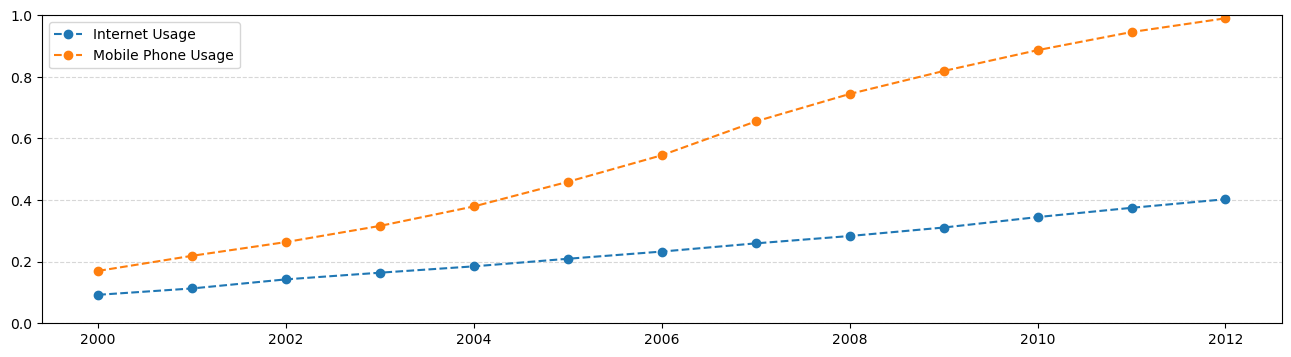

In [41]:
plt.figure(figsize =(16,4))
final_df.groupby('year')["Internet Usage"].mean().plot(style="--o", label="Internet Usage" )
final_df.groupby('year')["Mobile Phone Usage"].mean().plot(style="--o", label="Mobile Phone Usage")
plt.legend()
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(0,1);

## life expentacy male vs female

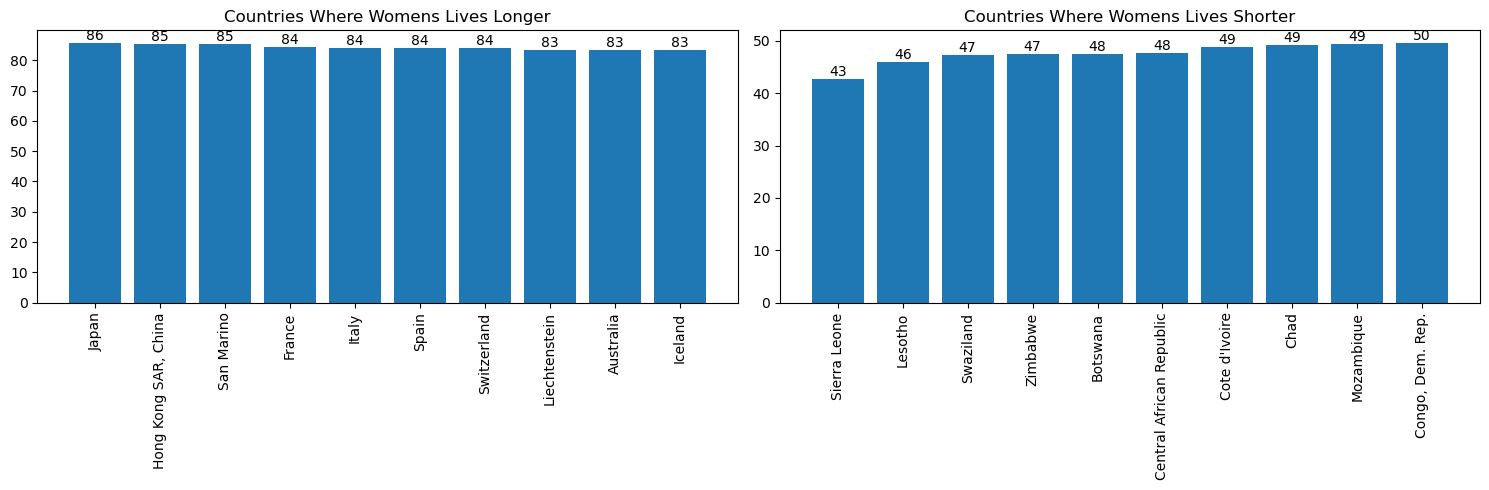

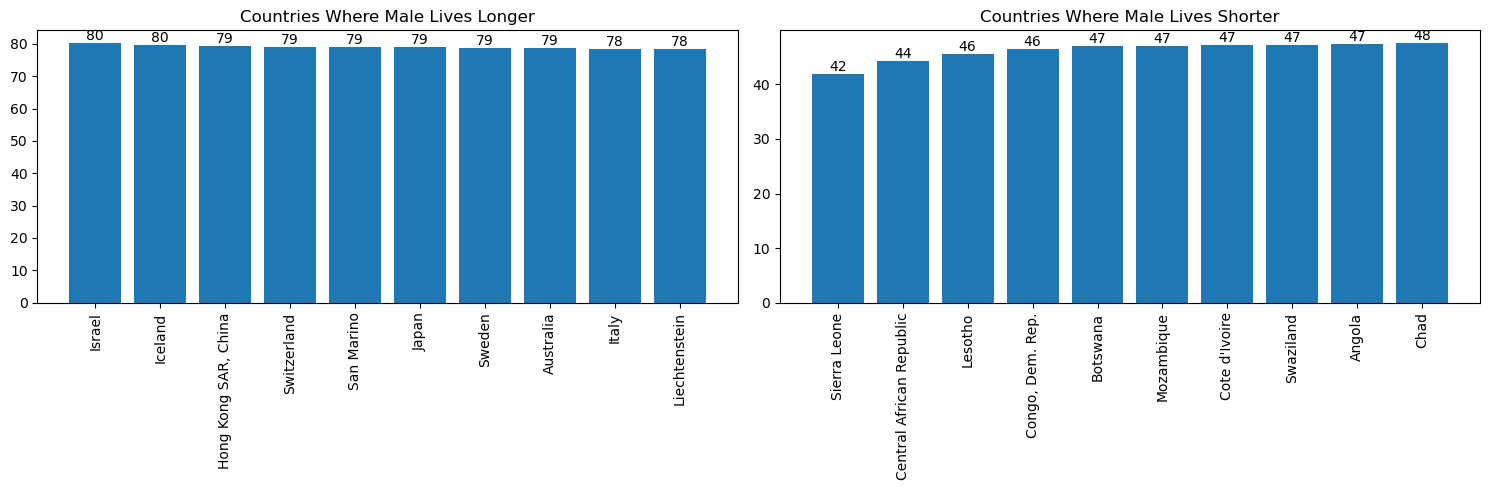

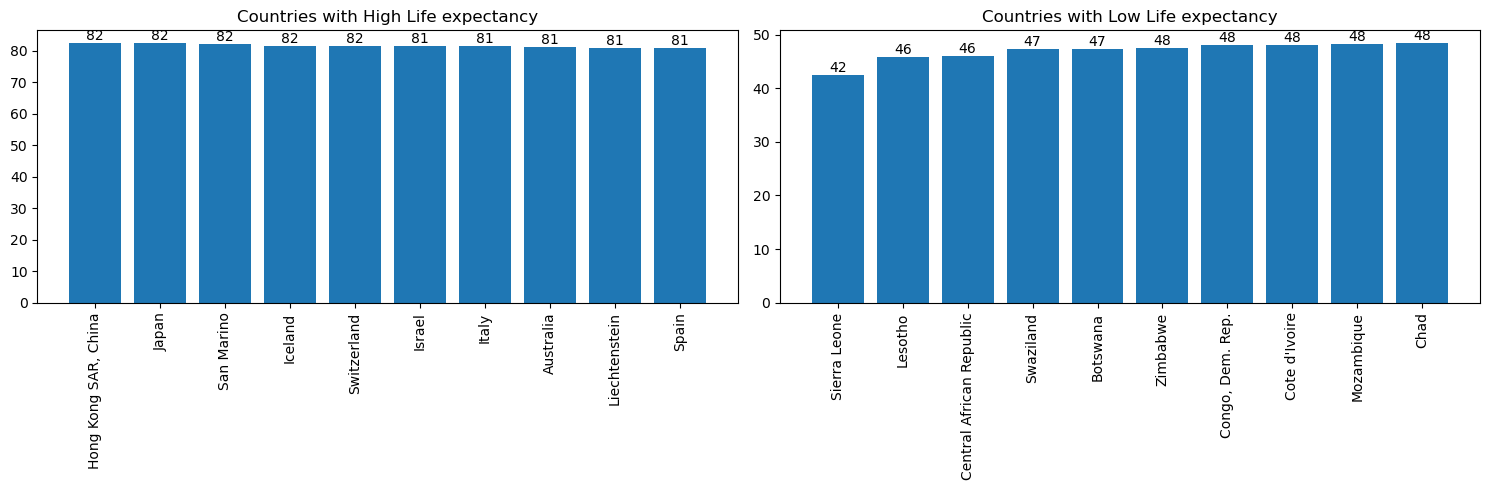

In [42]:
final_df["Life Expectancy Combined"] = (final_df["Life Expectancy Female"] + final_df["Life Expectancy Male"])/2
fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Life Expectancy Female"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)
ax[0].set_title("Countries Where Womens Lives Longer")
for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{value:.0f}', ha='center', va='bottom',)
plt.tight_layout()
    
    
bottom_10_gdp = (final_df.groupby("Country")["Life Expectancy Female"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index, rotation =90)
ax[1].set_title("Countries Where Womens Lives Shorter")
for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{value:.0f}', ha='center', va='bottom',)
plt.tight_layout()


fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Life Expectancy Male"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)
ax[0].set_title("Countries Where Male Lives Longer")
for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{value:.0f}', ha='center', va='bottom',)
plt.tight_layout()
    

bottom_10_gdp = (final_df.groupby("Country")["Life Expectancy Male"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index, rotation =90)
ax[1].set_title("Countries Where Male Lives Shorter")

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{value:.0f}', ha='center', va='bottom')

plt.tight_layout()

fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Life Expectancy Combined"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)
ax[0].set_title("Countries with High Life expectancy")
for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{value:.0f}', ha='center', va='bottom',)
plt.tight_layout()
    
    
bottom_10_gdp = (final_df.groupby("Country")["Life Expectancy Combined"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index, rotation =90)
ax[1].set_title("Countries with Low Life expectancy")
for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{value:.0f}', ha='center', va='bottom',)
plt.tight_layout()





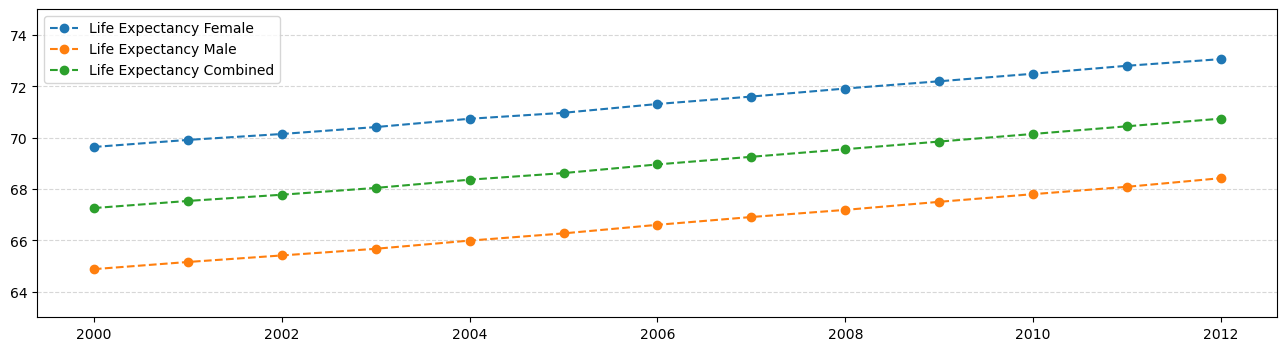

In [43]:
plt.figure(figsize=(16,4))
final_df.groupby('year')["Life Expectancy Female"].mean().plot(style="--o", label="Life Expectancy Female",)
final_df.groupby('year')["Life Expectancy Male"].mean().plot(style="--o", label="Life Expectancy Male",)
final_df.groupby('year')["Life Expectancy Combined"].mean().plot(style="--o", label="Life Expectancy Combined", )
plt.legend()
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(63,75);


## CORRELATION BETWEEN CO2 EMISSIONS AND LIFE EXPECTANCY

<Axes: >

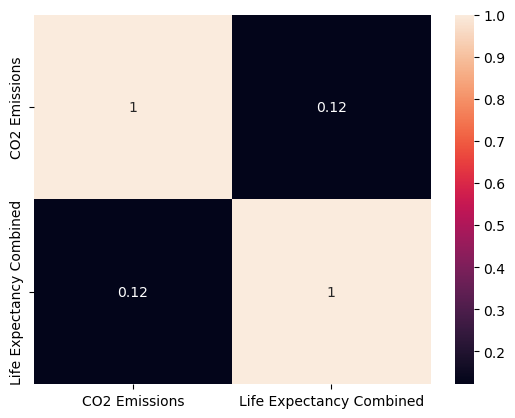

In [44]:
sns.heatmap(final_df[["CO2 Emissions" , "Life Expectancy Combined", ]].corr(), annot=True, )

## TOP AND BOTTOM COUNTRY WITH HEALTH EXP % GDP

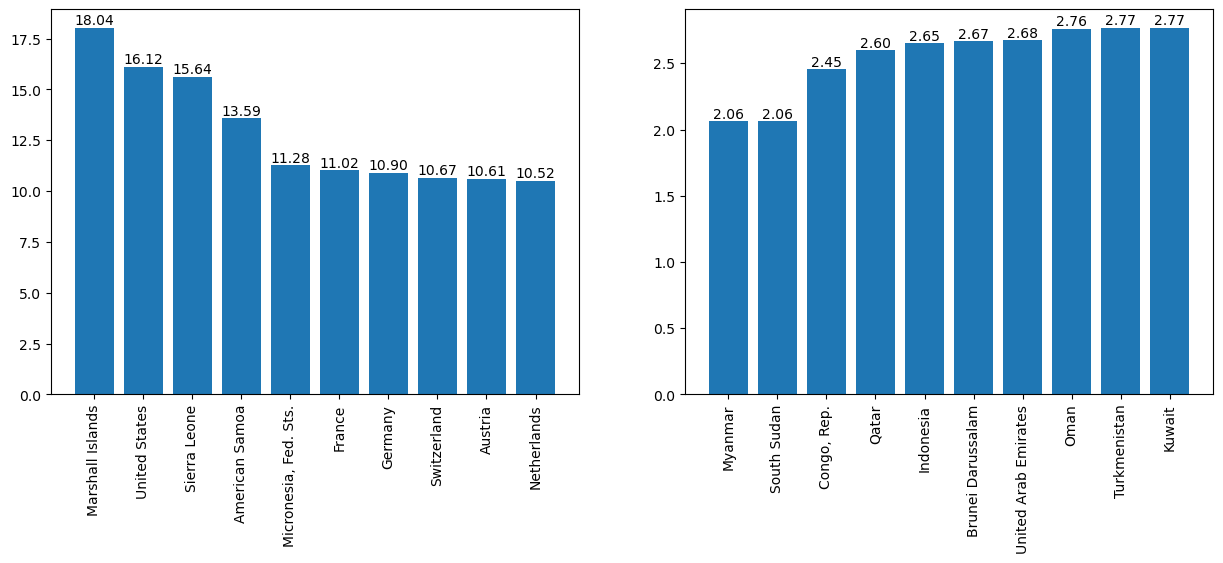

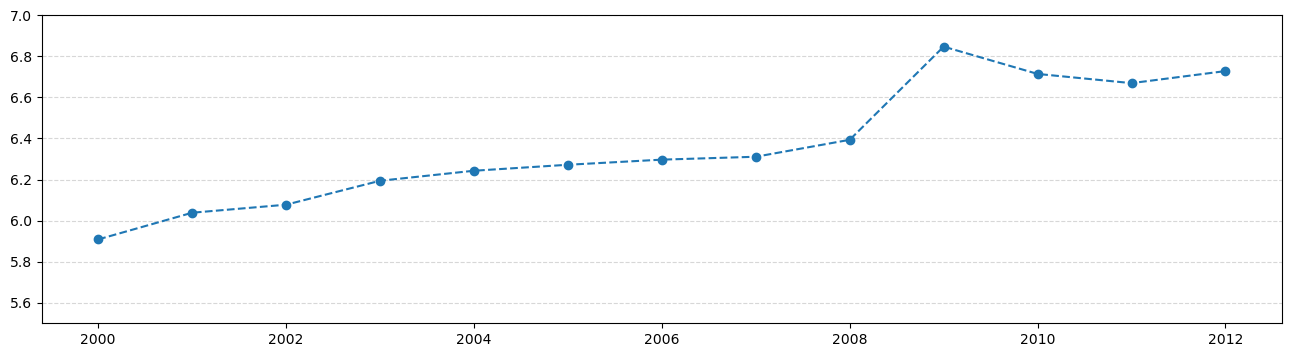

In [45]:

fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Health Exp % GDP"].mean()*100).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp,  )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{(value):.2f}', ha='center', va='bottom',)

    
    
bottom_10_gdp = (final_df.groupby("Country")["Health Exp % GDP"].mean()*100).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90, )

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{(value):.2f}', ha='center', va='bottom',)    

   
plt.figure(figsize =(16,4))
final_df.groupby("year")["Health Exp % GDP"].mean().mul(100).plot(style="--o",)
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(5.5,7);

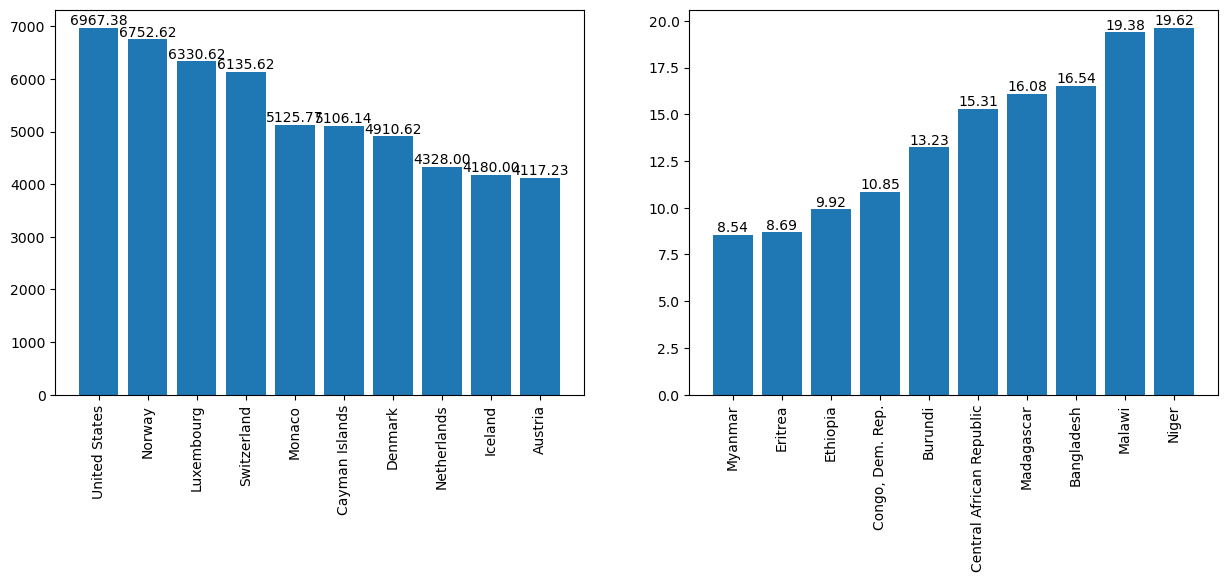

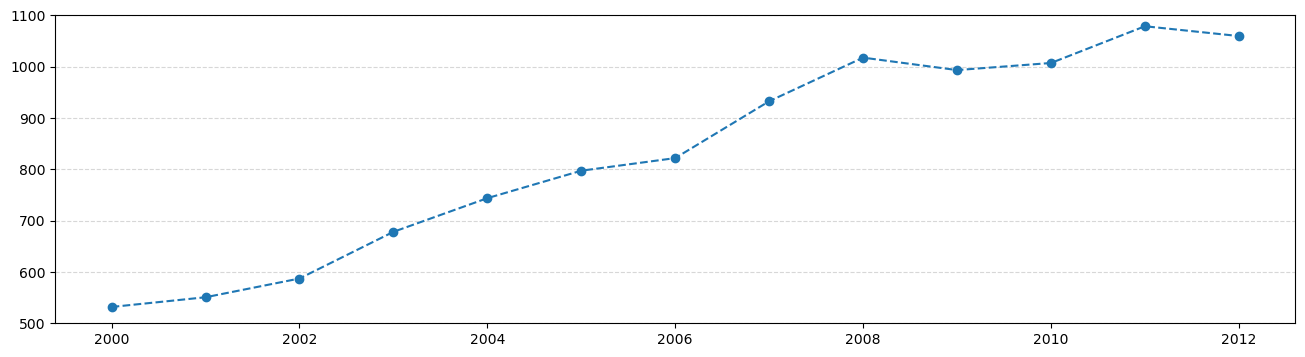

In [46]:

fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Health Exp/Capita"].mean()).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp  )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{(value):.2f}', ha='center', va='bottom',)

    
    
bottom_10_gdp = (final_df.groupby("Country")["Health Exp/Capita"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{(value):.2f}', ha='center', va='bottom',)    

   
plt.figure(figsize =(16,4))
final_df.groupby("year")["Health Exp/Capita"].mean().plot(style="--o",)

plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(500,1100);

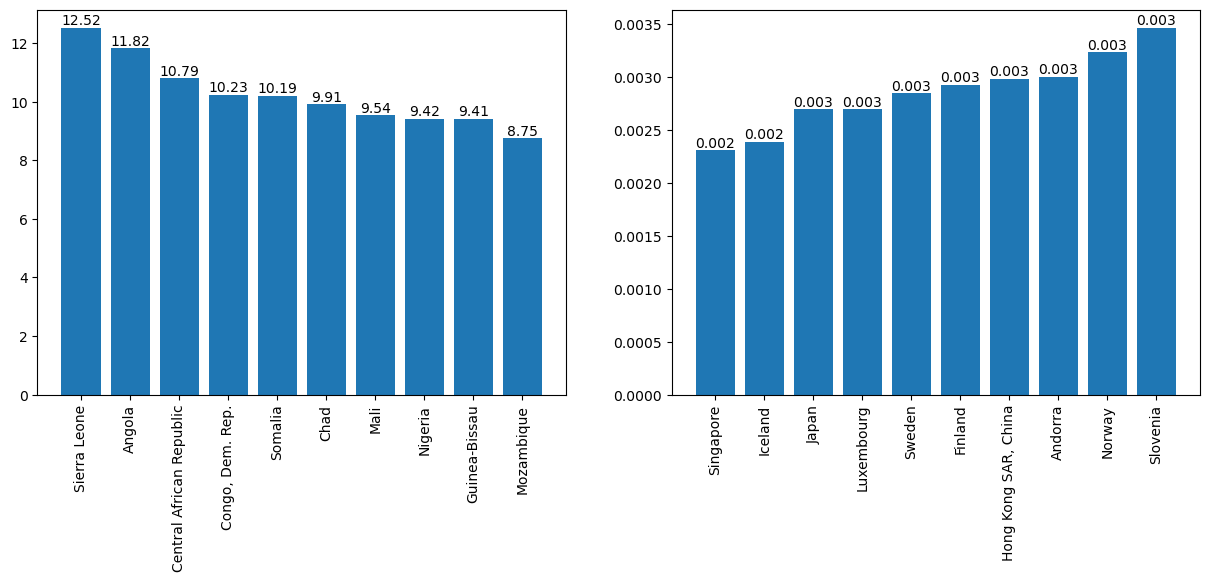

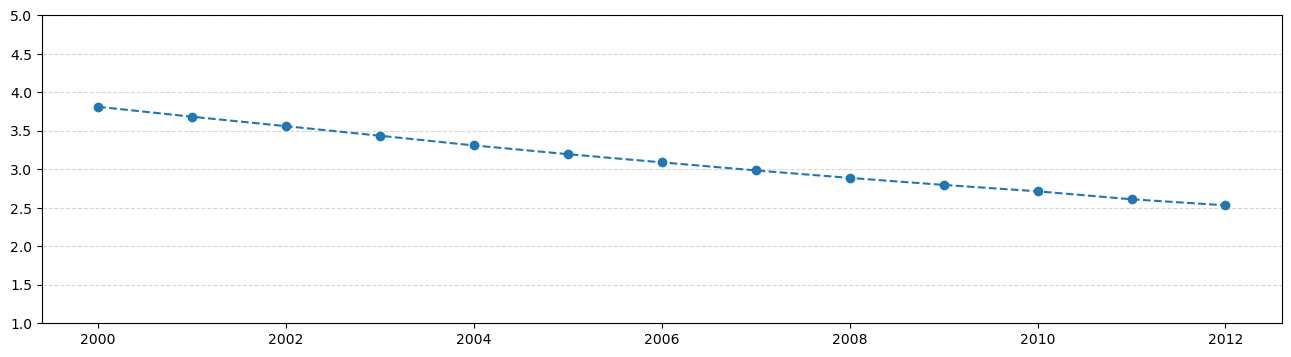

In [9]:

fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Infant Mortality Rate"].mean()*100).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp, )
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{(value):.2f}', ha='center', va='bottom',)

    
    
bottom_10_gdp = (final_df.groupby("Country")["Infant Mortality Rate"].mean()).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{(value):.3f}', ha='center', va='bottom',)    

   
plt.figure(figsize =(16,4))
final_df.groupby("year")["Infant Mortality Rate"].mean().mul(100).plot(style="--o",)
plt.ylim(0,5)
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.xlabel(None)
plt.ylim(1,5);

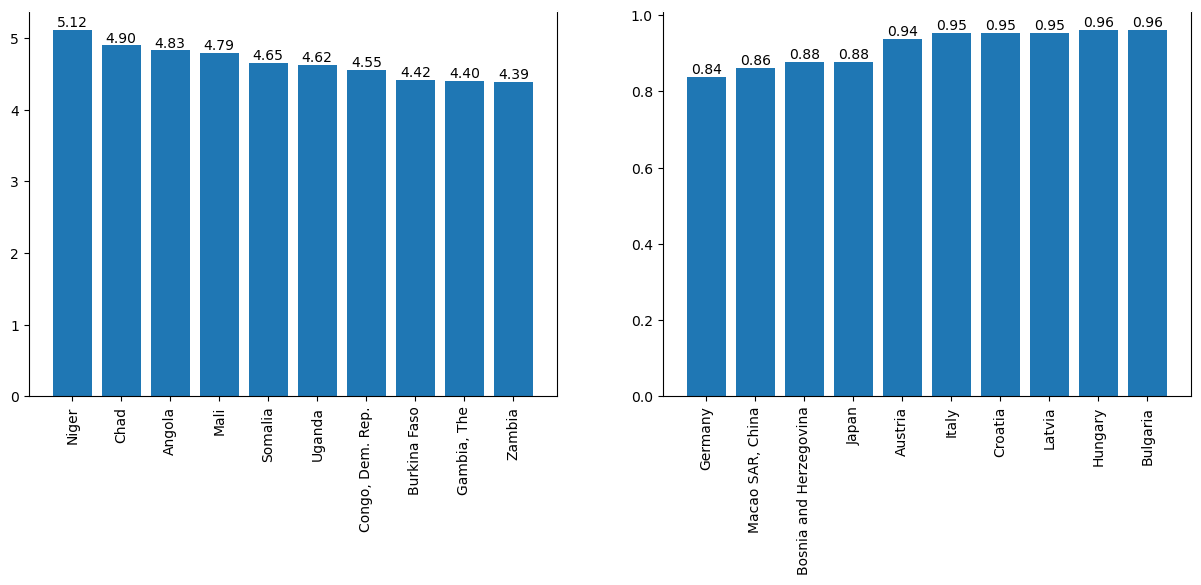

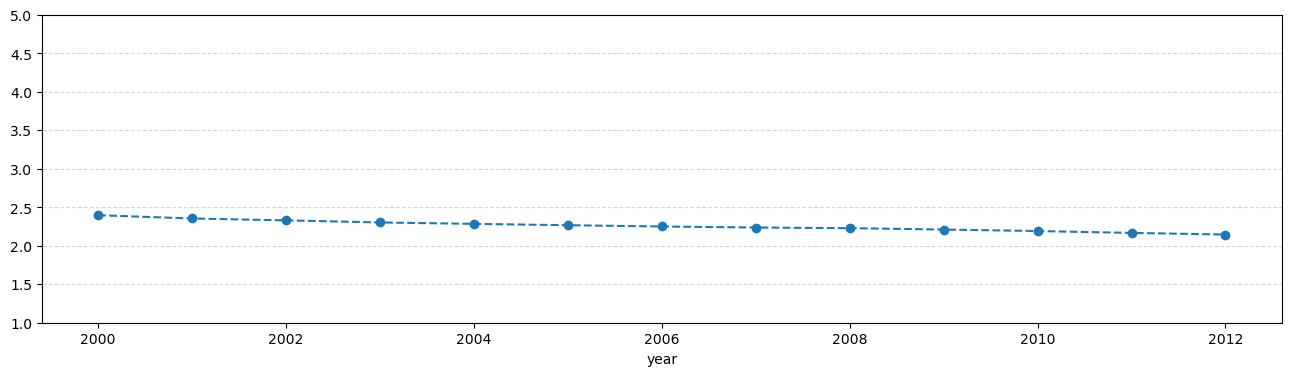

In [51]:

fig, ax = plt.subplots(1,2, figsize=(15,5))
top_10_gdp = (final_df.groupby("Country")["Birth Rate"].mean()*100).sort_values(ascending=False).head(10)
ax[0].bar(top_10_gdp.index, top_10_gdp,  )
ax[0].spines["top"].set_color("w")
ax[0].set_xticklabels(top_10_gdp.index,rotation =90)

for i , value in enumerate(top_10_gdp.head(10)):
    ax[0].text(i,value ,f'{(value):.2f}', ha='center', va='bottom',)

    
    
bottom_10_gdp = (final_df.groupby("Country")["Birth Rate"].mean()*100).sort_values(ascending=True).head(10)
ax[1].bar(bottom_10_gdp.index, bottom_10_gdp, )
ax[1].spines["top"].set_color("w")
ax[1].set_xticklabels(bottom_10_gdp.index,rotation =90)

for i , value in enumerate(bottom_10_gdp.head(10)):
    ax[1].text(i,value ,f'{(value):.2f}', ha='center', va='bottom',)    

   
plt.figure(figsize =(16,4))
final_df.groupby("year")["Birth Rate"].mean().mul(100).plot(style="--o",)
plt.ylim(0,5)
plt.grid(axis="y",linestyle='--', alpha=0.5)

plt.ylim(1,5);